In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

* Probability distribution is total listing of various value the random variable can take along with corresponding probability.

### General continuous distribution
* continuous random variable or distribution is defined via a probability density function.
* f(x) is density function of variable X, then 
![](images/continuous1.PNG)

* Probability of any particular random variable is 0. as put x1=x2=x in above equation
![](images/continuous3.PNG)

* We also have
![](images/continuous2.PNG)

* Cumulative distribution function is 
![](images/continuous4.PNG)


### Uniform Distribution
* Each variable in specified range has same probability.
* Probability density function is flat.
* Probability density function is 

$$f(x) = \frac{1}{b-a}$$
![](images/uniform.PNG)

![](images/uniform1.PNG)

* Suppose amount  of gas sold daily at pump is uniformly distributed with min of 2000 gallons and max of 5000 gallons
* Probability of daily sale fal between 2500 and 3000 is
    * $\frac{1}{5000-2000}(3000-2500)$ = 0.1667
    
* Probability of service station will sell at least 4000 gallons
    * P(X > 4000) = $\frac{1}{5000-2000}(5000-4000)$ = 0.3333

## Normal (Gaussian) Distribution
* Unimodal and symmetric
* Bell curve
* Follows very strict guideline about how variably data are distributed around the mean.
* It has 2 parameters mean $\mu$ and standard deviation $\sigma$

* Changing the mean shifts the curve left or right, changing the SD, stretched or constricts the curve.
![normal](images/normal1.JPG)

![normal](images/normal2.JPG)

In [5]:
from scipy.stats import norm
sample = norm.rvs(loc=0, scale=1, size=10000)

In [6]:
sns.distplot(sample)

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [7]:
norm.pdf(-1, loc=0, scale=1) # loc is mean and scale is SD

0.24197072451914337

* Probability of getting value below -1

In [8]:
norm.cdf(-1, loc=0, scale=1)

0.15865525393145707

In [9]:
norm.ppf(0.2) # Percent point funciton, maps value from probability

-0.8416212335729142

In [10]:
norm.sf(1) # probability of value more than 1

0.15865525393145707

In [11]:
norm.interval(0.68, loc=0, scale=1) # range of value 1 SD from mean

(-0.994457883209753, 0.9944578832097535)

* Time required to build a computer is mean 50 and SD 10, what is probability of time to build computer between 45 and 60

In [12]:
norm.cdf(60,loc=50, scale=10) - norm.cdf(45,loc=50, scale=10)

0.532807207342556

* Fixed amount of hike in entire sample, mean will increase by same amount, no change is SD.
* Relative hike like 20% mean = mean * 1.2, SD = SD * 1.2

* Dr collects heart rate measurement which is normally distributed. mean = 110, minimum = 65, max = 155. What is standard deviation?
    - approximately around 15 [(110 - 65) / 3]

* Which of the 2 test takers did better?
    - PAM 1800 SAT.
    - Jim 24 ACT
    - SAT is ~ N(mean = 1500, SD = 300)
    - ACT ~ N(mean = 21, SD = 5)\
* Both students score is measured on different scale. so we can not compare them directly.
* We should figure out how many SD far score from their respective mean.
    - For SAT, Pam's score is 1 SD away
    - For ACT. Jim's score is 3/5 = 0.6 SD away
    - So pam did better than Jim.

![normal](images/normal3.JPG)

* To convert back to original from z-score we can use x = 2$\sigma$ + $\mu$
* We can use original mean or deviation or we can choose whatever we want.

### Standardizing with Z-score
* Z-score (Standardize score) of an observation is the number of SD it falls above or below mean.

$$Z = \frac{observation - mean}{SD}$$

* Z-score of mean is 0.
* Unusual observation |Z| > 2
* It is defined for all distribution of any shape as every distribution has SD and mean.
* When distribution is normal Z-score is also be used to calculate percentiles. Percentile is % of observations that fall below given data point. It is basically area of the curve below given observation.
    - Ex. SAT Score, mean = 1500 SD = 300 , earned 1800 in exam. What is percentile
    - Z score = (1800-1500) / 300 = 1.00
    - P(z < 1) = 0.8413 according to [table](https://www.openintro.org/download.php?file=os2_prob_tables&referrer=coursera.php) 
    - 84.13 %

## Evaluate normal distribution
### Normal probability plot
* Useful to identify departure of normality, outlier, skewness, kurtosis(measure of tailness). Actually we sort the value, From standard normal distribution generate sample of same size as sample and sort it. Plot sorted value from the sample and random values. If distribution of sample is normal the result is straight line with mean as intercept and slope as standard deviation.
![](images/normal_probability_plot.PNG)
* Data are plotted on y-axis of a normal probability plot, and theoretical quantiles which follows normal distribution on the x-axis.
* If there is one to one relationship between the data and theoretical quantiles then the data follow normal distribution.
* Since one to one relationship would appear as a straight line on scatter plot, the closer the point to the line, more confident we can be that data follow normal distribution.
![normal](images/normal4.JPG)

![normal](images/normal5.JPG)

* Most point near the low end with fewer observations scattered on  high end, which is right skewed.
* Most point near the high end with fewer observations scattered on  low end, which is right skewed.

* To meausre kurtosis use
```
stats.kurtosis(distribution)
```
* Negative means curveis slightly more flat than normal distribution, +ve means curve is more peaky than normal distribution

* Using `stats.skew(distribution)` we can find skew

![](images/birth_weight_normal_probability_plot.PNG)
* Heaviest baby are heavier than the ideal and lighter are very light. Normal model are well within few standard deviation from mean, but after that not normal.

* In log normal model, to visualize how well the sample fits a log normal model we can make normal probability plot of log value in sample.
![](images/lognormal.PNG)

* Height, strength, temperature are normally distributed.
* Age of retirement, car price after discount, Age of death are negative (left) skewed distribution
* Time between call in call center, time until light bulb die, amount of drug in blood are right skewed.

In [13]:
import scipy.stats
scipy.stats.norm.cdf(0) # median of standard normal distribution is 0 half value falls below it so cdf(0) = 0.5

0.5

![](images/cdf_normal.PNG)

```
plot(x, y, marker = '.', linestyle = 'none')
```

In [18]:
import math
import matplotlib.pyplot as plt
def normal_pdf(x, mu=0, sigma= 1):
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu) ** 2/2/sigma**2)/(sqrt_two_pi * sigma))

Text(0.5, 1.0, 'Normal pdf')

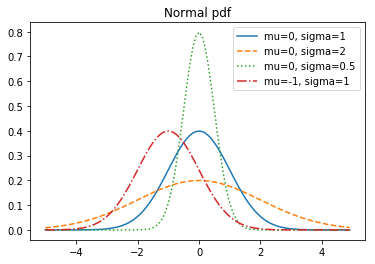

In [19]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu = -1, sigma=1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Normal pdf")

In [22]:
def normal_cdf(x, mu= 0, sigma =1):
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma)) /2

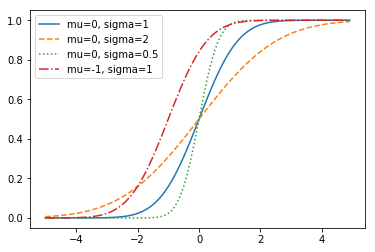

In [25]:
xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs], '-',label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs], '--',label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs], ':',label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs], '-.',label='mu=-1, sigma=1')
plt.legend()

* CDF implementation

In [76]:
def cdf(data):
    n = len(data)
    x = sorted(data)
    y = np.arange(1, n + 1) / n
    
    return (x,y)

* Then using `plt.plot(x,y, marker = '.')` plot cdf

C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(-0.01, 0.42)

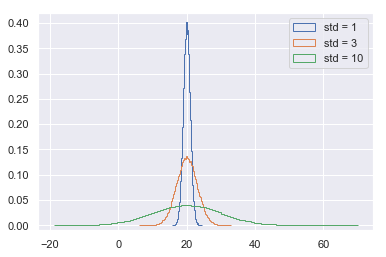

In [74]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)


# Make histograms
plt.hist(samples_std1, bins = 100, normed=True,histtype='step')
plt.hist(samples_std3, bins = 100, normed=True,histtype='step')
plt.hist(samples_std10, bins = 100, normed=True,histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)

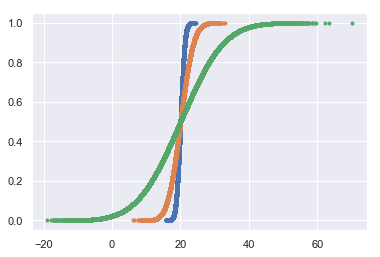

In [78]:
# Generate CDFs
x_std1, y_std1 = cdf(samples_std1)
x_std3, y_std3 = cdf(samples_std3)
x_std10, y_std10 = cdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker = '.', linestyle='none')
plt.plot(x_std3, y_std3, marker = '.', linestyle='none')
plt.plot(x_std10, y_std10, marker = '.', linestyle='none')

-----------

# Bernoulli Distribution
* When individual trial has only 2 possible outcome, it is called **Bernoulli random variable**. We label one of those as success and other as failure. Ofter encoded as 1 for success and 0 for failure.
* According to milgram experiments 65% people obey authority and give shocks. If person give shock it is failure, otherwise success.
* 0.65 probability of failure, 0.35 probability of success.

* If X is the random variable which take value 1(success) with probability p. and 0(failure) with 1-p, so X is bernoulli random variable with mean = p, and SD = $\sqrt{p(1-p)}$

* P is probability of success so mean of random bernoulli variable,
    - mean = E[X] = P(X = 0) * 0 + P(X = 1) * 1 = (1-p) * 0 + p * 1 = p
* Variance = P(x = 0) (0 - p)^2 + P(X = 1) (1 - p)^2 = p(1 - p)

In [33]:
from scipy.stats import bernoulli
bernoulli.rvs(p = 0.5, size = 1) # simulate 1 coin flip with 0.5 success

array([0])

In [34]:
bernoulli.rvs(p = 0.5, size = 10) # simulate 10 coin flip with 0.5 success

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [35]:
sum(bernoulli.rvs(p = 0.5, size = 10)) # number of success in 10 coin flip with 0.5 success

3

In [37]:
from scipy.stats import binom
binom.rvs(n=10, p = 0.5, size=20)
# 20 trials of 10 coin flip with success 0.5 and count number of success in each trial

array([5, 5, 6, 5, 4, 7, 4, 3, 4, 6, 3, 6, 5, 6, 4, 7, 4, 6, 4, 4])

In [58]:
from scipy.stats import describe

In [60]:
describe(binom.rvs(n=1, p=0.5, size=2000)).mean # mean of 2000 coin flip

0.519

In [62]:
describe(binom.rvs(n=10, p = 0.5, size= 1000))

DescribeResult(nobs=1000, minmax=(0, 10), mean=4.945, variance=2.4163913913913917, skewness=-0.014005210680475236, kurtosis=-0.04122077495192933)

* Generate sample of 2 coin flip for 1000 throws

In [63]:
sample = binom.rvs(n=2, p=0.5, size=1000)

In [65]:
sample[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [67]:
from scipy.stats import find_repeats
find_repeats(sample) # how many times each outcomes repeat

RepeatedResults(values=array([0., 1., 2.]), counts=array([265, 490, 245], dtype=int64))

In [69]:
binom.pmf([0,1,2], n=2, p=0.5) # probability of 0 head, 1 head and 2 head

array([0.25, 0.5 , 0.25])

In [59]:
def perform_bernoulli_trials(n, p):
    arr = np.random.random(size = n)
    return np.sum(arr < p)

In [60]:
perform_bernoulli_trials(100, 0.05)

4

* How many defaults might we expect?
    - Bank make 100 mortgage loans. It is possible that between 0 and 100 of loans will defaulted. P = 0.05 is 
    - We will simulate our study

In [61]:
n_defauts = np.empty(1000)
for i in range(1000):
    n_defauts[i] = perform_bernoulli_trials(100,0.05)
    
# Above can be done as
# np.random.binomial(100,0.05,size=1000)

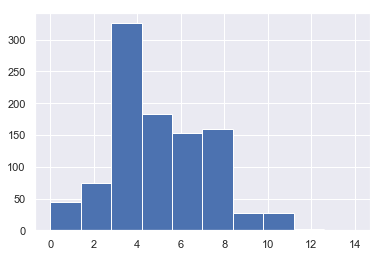

In [62]:
plt.hist(n_defauts);

In [63]:
def cdf(data):
    x = sorted(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return (x,y)

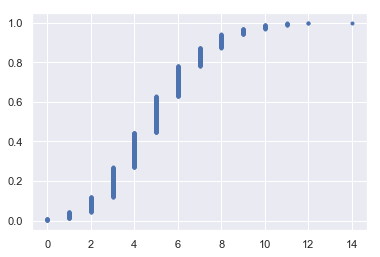

In [64]:
x,y = cdf(n_defauts)
plt.plot(x,y, marker = '.', linestyle='none')

* Less than 2% chance that more than 10 loand default out of 100.

* Let's plot PMF

C:\Users\davep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


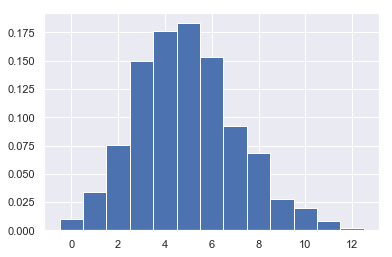

In [67]:
bins = np.arange(min(n_defauts), max(n_defauts)) - 0.5 # 0.5 to make number centered in bin
plt.hist(n_defauts, bins = bins, normed=True);

# Geometric Distribution
* Allows us to calculate probability  of success after k trials, given the probability of success for each trial.
* Describes wait time until a success for independent and identically distributed bernoulli random variable. Independent means observations in example do not affect each others. Identical means they each have same probability of success.
* Probability of geometric distribution decreases exponentially fast.
* Probability of success is p and failure is 1-p. then probability of finding success in nth trial given by $(1 - p)^{n-1} p$ 
* mean = $\frac{1}{p}$, SD = $\sqrt{\frac{1 - p}{p^2}}$

* Ex. Milgram's experiment what is chance that 1st experiment will find success = 0.35
* what is chance that 2nd experiment will find success = 0.65 * 0.35
* what is chance that 3rd experiment will find success = 0.65 * 0.65 * 0.35
* what is chance that nth experiment will find success = $0.65^{n-1}$ * 0.35

* On average it takes 1/p trial to get success. If p is high then low trials needed p = 0.8 => 1/0.8 = 1.25 trial
* P = 0.1 => 1/10 = 10 trials
* Geometric distribution is always right skewed can not be well approximated by normal model.
![Geometric distribution](images/geometric_distribution.JPG)

In [88]:
from scipy.stats import geom
# Probability of I catch fish after 29 consecutive times P = 0.03333
geom.pmf(k=30, p=0.0333)

0.012471080216374412

* Probability of basket ball player throw in 4 or fewer attempts

In [89]:
geom.cdf(k=4, p=0.3)

0.7599

* Player will score in more than 2 attempt

In [91]:
geom.sf(k=2, p=0.3)

0.49

In [93]:
geom.ppf(q=0.6, p=0.3) # number of attempts needed p

3.0

In [95]:
sample = geom.rvs(p=0.3, size=10000)

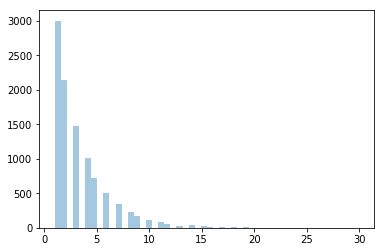

In [97]:
sns.distplot(sample, kde=False);

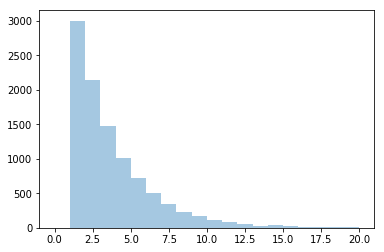

In [99]:
sns.distplot(sample, bins = np.linspace(0,20,21), kde=False);

# Binomial Distribution
* Number of H/T in sequence of coin flip
* Vote count for 2 different candidate in election
* Number of male/female employee in company
* Number of successful sales calls
* Number of defective products in production run
* We are interested in total number of success in n trials. Let X is random variable which is number of success, probability distribution of X is called binomial distribution.
* What is the probability that exactly 1 of person out of 4 refuse to administer shock?
    - 0.35 * 0.65 * 0.65 * 0.65 Or  0.35 * 0.65 * 0.65 * 0.65 Or 0.35 * 0.65 * 0.65 * 0.65 Or 0.35 * 0.65 * 0.65 * 0.65
    - 0.35 * 0.65 * 0.65 * 0.65 +  0.35 * 0.65 * 0.65 * 0.65 +  0.35 * 0.65 * 0.65 * 0.65 +  0.35 * 0.65 * 0.65 * 0.65 
    - 0.3844

* Binomial distribution describes the probability of having k success in n independent Bernoulli trials with probability of success p, 1 - p is probability of failure.
![Binomial distribution](images/binomial_distribution.JPG)   

* Above is PMF, allows us to get probability of district random variable.

In [42]:
binom.pmf(k = 5, n = 10, p = 0.5) # get probability of getting 5 head from 10 flips

0.24609375000000025

In [43]:
binom.cdf(k = 5, n=10, p = 0.5) # probability of getting 5 or smaller heads from 10 coin flips

0.6230468749999999

* To get probability of head for more than 5 times 

In [44]:
 1 - binom.cdf(k = 5, n=10, p = 0.5)

0.3769531250000001

* or

In [47]:
binom.sf(k=5, n= 10, p =0.5) # survival function

0.3769531250000001

In [51]:
binom.stats(n=1, p=0.5) # return expected value and variance

(array(0.5), array(0.25))

In [52]:
binom.stats(n=10, p=0.5) # expected value from 10 coin flips

(array(5.), array(2.5))

* Example:
* We noticed out of 50 product we get 2 % product faulty.
* What is probability of getting 1 product faulty out of 50


In [48]:
binom.pmf(k=1, n=50, p = 0.02)

0.37160171437461204

* What is probability of getting 0 product faulty

In [49]:
binom.pmf(k=0,n=50, p=0.02)

0.3641696800871171

* what is probability of 2 or less product faulty

In [50]:
binom.cdf(k=2, n=50, p = 0.02)

0.9215722516490308

* Ex. How many scenario yield 1 success in 4 trials

$$\binom{4}{1} = \frac{4!}{1! * 3!} = 4$$ 

* Ex. How many scenario yield 2 success in 9 trials

$$\binom{9}{2} = \frac{9!}{2! * 7!} = 36$$ 

* Number of total items defective in production is binomial if probability of  bad product is constant
* Proportion of customer satisfied by service
* Number of people respond to a treatment
* Number of people answer yes to survey.

<BarContainer object of 11 artists>

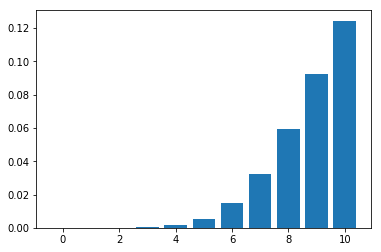

In [15]:
from scipy.stats import binom

outcome_count = [0,1,2,3,4,5,6,7,8,9, 10]
dist = binom.pmf(outcome_count, 30, 0.39)  # 30 is N and 0.39 is probability of success
plt.bar(outcome_count, dist)

* To generate probability of number of k or smaller success occur we can use cdf

In [22]:
binom.cdf(4, 10, 0.39)

0.6579615314099678

In [23]:
# np.random.binomial(n, p, size) # n is number of events, with success p (head is success for our example)
np.random.binomial(10, 0.5)

4

* 4 is number of success meaning number of head.

* There are 10 multiple questions. Only 1 answer is correct, Probability of success = 0.25.
* What is the probability for the student getting 0 answer correct.
    - P(X=0) = $\frac{10!}{0!(10-0)!}0.25^0(1-0.25)^{10-0}$ = 0.0563

In [100]:
binom.pmf(k=0, n=10, p=0.25)

0.056313514709472684

* What is the probability for the student getting 2 answer correct.
    - P(X=2) = $\frac{10!}{2!(10-2)!}0.25^2(1-0.25)^{10-2}$ = 0.2816

In [103]:
binom.pmf(k=2, n=10, p=0.25)

0.28156757354736334

* E(X) = 10 * 0.25 = 2.5
* V(X) = 10 * 0.25 * (1-0.25) = 1.875

### Binomial conditions
* Trials must be independent.
* Number of trial n must be fixed.
* Each trial outcome must be classified as a success or failure.
* Probability of success p must be same for each trial.

* Number of people download new music app is not binomial as it can be forced by their friends.

* Always verify condition before using binomial model.
* Ex. 13% of employees are committed to job.among random sample of 10 employees what is the probability that 8 are committed to work?
    - $\binom{10}{8} * 0.87^2 * 0.13^8$ = 0.00000278

* Binomial distribution Expected value = mean = n * p
* Expected value is most likely result of single sample we look at. SD is how much actual value will vary from expectation.
* Expected value is sum of possible outcomes weighted by its probability
* Variance is expected value of the squared deviation from its expected value
* Out of 100 employee how many expected to commited to work ? = 10  * 0.13 = 13 
* SD = $\sqrt{np(1-p)}$
* Sd for above example = 3.36, meaning 13 out of 100 expected to be commited to work give or take 3.36 employees.

### Normal approximation of binomial
* When we want to find range of observations normal approximation is useful,
    - Ex. 25% FB users are power users. Avg FB friends = 245, P(70 or more power users)
    - P(70) + p(71) + P(72) + ---- + P(245) Which is very hard to find via hand.
    - mean = np = 61.25, SD = 6.75
    - Using normal approximation, Z = 1.29 
    - Probability = 0.0985
    - This will be not exactly same as binomial (in short range approximations falls short), as under continuous normal distribution Probability of exact 70 success is undefined so start from P(>=69.5). Result we get 0.1112
* When sample size is large enough binomial distribution looks like normal.
![Binomial  Normal distribution](images/normal_binomial.JPG)

* When can I use normal approximation?
     - Binomial distribution with at least 10 expected successes and 10 expected failures closely follows a normal distribution
     - np >= 10, n(1-p) >=10
* In this can we can approximate binomial(n, p) ~ normal(mean, SD)
    - where mean = np and SD = $\sqrt{np(1-p)}$
* Also use 0.5 adjustment so probability via normal approximation is much closer to binomial.
* Ex. what is minimum n for binomial distribution with p = 0.25 to follow a normal distribution.
    - n * 0.25 >= 10 and n * 0.75 >=10 --> n >= 40 and n >= 13.33 --> at least 40 observation needed.

# Negative binomial Distribution
* Probability of observing kth success on nth trial.
* Condition for negative binomial
    - Trials must be independent
    - Each trial outcome can be classified as success of failure
    - Probability of success p is same for each trial
    - Last trial must be success
![Negative  binomial distribution](images/negative_binomial.JPG)

* We fix last observation to success. SO out of other n-1 observation we want k - 1 success. So, $\binom{n-1}{k-1}$

* A fair coin flip produces heads

In [79]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

0.499331

* Five fair coin flips produce exactly one head

In [80]:
# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5, 0.5, int(1e6))

# proportion of tests that produced 1 head
(tests == 1).mean()

0.155951

* Ten fair coin flips produce exactly four heads

In [81]:
# simulate 1 million tests of ten fair coin flips
tests = np.random.binomial(10, 0.5,size=int(1e6))

# proportion of tests that produced 4 heads
(tests==4).mean()

0.205651

* Five biased coin flips with P(H) = 0.8 produce exactly five heads

In [83]:
# simulate 1 million tests of five biased coin flips
tests = np.random.binomial(5, 0.8, int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

0.326805

* Ten biased coin flips with P(H) = 0.15 produce at least 3 heads

In [84]:
# simulate 1 million tests of ten biased coin flips
tests = np.random.binomial(10, 0.15, size=int(1e6))

# proportion of tests that produced at least 3 heads
(tests >= 3).mean()

0.179012

### Binomial vs Negative binomial
* In binomial we have fix number of trials and consider number of success.
* In negative binomial we examine how many trials take to observe fixed number of success being last trial is success.

* Ex. P = 0.8 of kicking goal. Probability of observing 4th goal on 6th trial?
    - $\binom{5}{3} * 0.8^4 * 0.2^2$ = 0.164

### Poisson process
* Timing of the next event is completely independent of previous event happened.
* Natural birth in given hospital.
* Hit on website in a given hour
* Aviation accident
* Number of arrival of poisson process in given time is poisson distribution.
    - THe number of hists on a website in one hour with an average hit rate of 6 per hour in poisson distribution.

* Poisson distribution is limit of binomial distribution for rare events. We do bernoulli trial every minute for an hour,  each with success probability of 0.1. We will do 60 trials, we will expect total 6 successes in 1 hour. This is like poisson distribution with average 6 hits per hour. Poisson distribution with arrival rate of np approximates a binomial distribution for n binomial trial and with probability of success p

In [68]:
sample_poisson = np.random.poisson(10, size=10000)

In [69]:
np.mean(sample_poisson)

9.9963

In [70]:
np.std(sample_poisson)

3.1509183280434296

In [73]:
n = [20,100,1000]
p = [0.5,0.1,0.01]
for i in range(3):
    sample_binomial = np.random.binomial(n[i], p[i], size=10000)
    print('n = {}, p = {}, mean = {}, std = {}'.format(n[i], p[i], np.mean(sample_binomial), np.std(sample_binomial)))

n = 20, p = 0.5, mean = 9.9975, std = 2.2225871748932593
n = 100, p = 0.1, mean = 10.0126, std = 3.0353980365019675
n = 1000, p = 0.01, mean = 9.9894, std = 3.095462427489631


* As P gets lower SD of binomial get closer to poisson.
* When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval

# Poisson Distribution
* Model frequency by which event occur during fixed interval of time. 
* Hourly number of customer arrive at bank
* Daily accident on particular highway
* Hourly number of access to web server
* Number of emergency calls in 911.
* Monthly absent employee
* Monthly demand of product.
* Estimates number of events in a large population over a unit of time. Ex. Having heart attack, getting married.
* Describes number of events that will occur in a fixed time for a fixed population if the individuals within population are independent.
* The distribution of number of events in an interval is the same for all intervals of the same size.
* For a “small” time interval, the probability of observing an event is proportional to the length of the interval.
* The probability of observing two or more events in an interval approaches zero as the interval becomes smaller.
* $\lambda$ be the rate at which events occur, t be the length  of interval and X be the total number of events in the time interval. X is poisson random variable and the probability distribution of X is Poisson distribution. 
* Parameter is poisson distribution is rate $\lambda$.
* Using rate we can describe probability of observing exactly k events in a unit of time.
![poisson](images/poisson.jpg)


* Number of telephone call arriving in call center
* Probability of number of events occurs in fixed interval of times of that event occurring with known constant rate and independent to time since last happen.
* Individual receive 4 mail per day, if receiving mail is independent from each other then number of mail received per day can be modeled as poisson distribution.
* In bank 6 customer arrive in 2 minutes, what is probability of exactly 4 customer will come in given minute.
    * $\lambda = 3$ 
    - 0.168031

* Average call per minute  at call center is 2.2. Find Probability of having 3 phone calls

In [80]:
from scipy.stats import poisson
poisson.pmf(k=3, mu=2.2)

0.19663867170702193

In [81]:
poisson.pmf(k=0, mu=2.2) # Probability of not getting any call

0.11080315836233387

* Probability of having 2 or fewer phone calls in a minute

In [82]:
poisson.cdf(k=2, mu=2.2)

0.6227137499963162

In [ ]:
* Probability of more than 2 calls per minute

In [83]:
poisson.sf(k=2, mu=2.2)

0.3772862500036838

In [84]:
poisson.ppf(q=0.5, mu=2.2) # nunmber of call likely to happen with probability 0.5

2.0

In [85]:
sample = poisson.rvs(mu=2.2, size=10000)

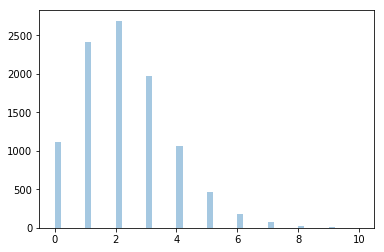

In [87]:
sns.distplot(sample,kde=False);

* Number of typos in text book is poisson distributed with mean 1.5 per 100 page. Suppose 100 page are randomly selected from text book what is the probability of no typos?

P(X=0) = $\frac{1.5^0 * e^{-1.5}}{0!}$ = 0.2231

In [106]:
poisson.pmf(k=0, mu = 1.5)

0.22313016014842982

* 400 pages are randomly selected what is the probability of no typos

P(X=0) =  $\frac{1.5*4^0 * e^{-1.5*4}}{0!}$ = 0.002479

In [107]:
poisson.pmf(k=0, mu=1.5*4)

0.0024787521766663585

#### Poisson approximation to the binomial distribution
* Divide time interval in n equal size subinterval. Suppose n is very large so that either 1 or 0 event can occur in sub interval. Probability of event to occur in subinterval is $\mu$/n, independent of other subintervals. Total number of events X in that interval has a binomial distribution with parameter n and $\mu$/n
![](images/poisson_approx.PNG)

### Pareto distribution
* Describe size of city, town, sand particles, forest fire and earthquake.

CDF(X) = 1 - $\frac{x}{x_m}^{-\alpha}$

* $x_m$ and $\alpha$ determine location and shape of distribution. $x_m$ is minimum possible value

### Probability density function
* Assign relative likelihood to each observation in distribution
* PDF is derivation of CDF.
* PDF of exponential distribution is $\lambda e^{-\lambda e}$
* It measure probability per unit of x.
* KDE is algorithm that takes a sample and finds approximate smooth PDF that can fit data

In [6]:
# scipy.stats.gaussian_kde(sample)

* It is used in visualization, interpolation(estimate population) from sample. If population distribution is smooth, we can use KDE to interpolate value that does not appear in sample. KDE is used to smooth the sample when sample size is small.

### Probability mass function
* Probability of discrete set of values.
* To get CDF from PMF we add up probability to get cumulative probability. To get PMF from CDF we compute difference in cumulative probability. CDF is integration of PDF.
![](images/distribution_functions.PNG)

### Pearson median skewness coefficient
* Measure of skewness based on the difference between sample mean and median
$$3\frac{(\bar{x} - median)}{SD}$$

* Sign of skewness shows left or right skew.

* Jittering reduce effect of rounding and make shape more cleaner.

* In continuous distribution probability of each outcome is 0. 
* Probability of spinning bottle stops at 180 = 0
* Probability of spinning bottle stops between 0 to 180 is 0.5. P(a < x <= b) = |b-a| / 360.
* 

## Exponential Distribution
* The waiting time between arrival of poisson process is Exponentially distributed.
* f(x) = $\lambda e^{-\lambda x}$
* $\lambda$ is rate, instantaneous failure rate of a device at any time t, given that device survived up to t.
* Useful to model time interval between random events.
* The length of time between telephone calls
* The length of time between arrivals at a service station
* The life time of electronic components, i.e., an interfailure time
* Total number of events in time period t follows Poisson distribution $\lambda t$

* E(X) = 1/$\lambda$
* V(X) = $\frac{1}{\lambda}^2$

* Greater the rate faster the curves drops

* The lifetime X of an alkaline battery is exponentially distributed with λ = 0.05 per hour.
    - E(X) = 1/0.05 = 20hrs
* What are the probabilities for the battery to last between 10 and 15 hours and to last more than 20 hours? 
    - P(10 < x <= 15) = $e^{-0.05*10} - e^{-0.05*15}$ = 0.1341
    - P(X>20) = $e^{-0.05*20}$ = 0.3679